problem 1 

In [10]:
def subsets(n):
    def backtrail(start, path):
        powerset.append(path[:])
        for i in range(start, len(n)):
            path.append(n[i])
            backtrail(i + 1, path)
            path.pop()

    powerset = []
    backtrail(0, [])
    return powerset

input_set = []
print("the set by spaces ")

input_set = input().split(" ")
output= subsets(input_set)
print("the powerset: \n", output)


the set by spaces 
the powerset: 
 [[], ['1'], ['1', '2'], ['1', '2', '3'], ['1', '3'], ['2'], ['2', '3'], ['3']]


problem 2

In [27]:
def xnor_operation(value1, value2):
    result = (value1 and value2) or (not value1 and not value2)
    return result

input1 = bool(int(input("first number 0 / 1: ")))
input2 = bool(int(input("second vnumber 0 / 1: ")))

output = xnor_operation(input1, input2)

print(f"XNOR: {int(output)}")

XNOR: 1


problem 3

In [17]:
def generate_next_combination(prefix, remaining, combinations, length):
    if len(prefix) == length:
        combinations.append(prefix)
        return
    
    for i in range(len(remaining)):
        next_digit = remaining[i]
        new_prefix = prefix + [next_digit]
        new_remaining = remaining[:i] + remaining[i+1:]
        generate_next_combination(new_prefix, new_remaining, combinations, length)

def next_combination(arr):
    length = len(arr)
    combinations = []
    generate_next_combination([], arr, combinations, length)
    combinations.sort()
    
    for i in range(len(combinations)):
        if combinations[i] == arr:
            if i == len(combinations) - 1:
                return combinations[0]
            else:
                return combinations[i+1]

input_array = list(map(int, input("enter separated by space ").split()))
result = next_combination(input_array)
print("next combination:", result)


next combination: [2, 1, 3]


problem 4

In [18]:

from prettytable import PrettyTable

def generate_truth_table(expression):
    variables = extract_variables(expression)
    num_variables = len(variables)

    table = PrettyTable(variables + ['Result'])
    table.align = 'c'

    for i in range(2 ** num_variables):
        row = get_binary_representation(i, num_variables)
        values = [int(bit) for bit in row]
        result = evaluate_expression(expression, variables, values)
        table.add_row(values + [result])

    print(table)

def extract_variables(expression):
    return list(set(char for char in expression if char.isalpha()))

def get_binary_representation(decimal, length):
    binary = bin(decimal)[2:]
    return '0' * (length - len(binary)) + binary

def evaluate_expression(expression, variables, values):
    for var, value in zip(variables, values):
        expression = expression.replace(var, str(value))

    expression = expression.replace(" ", "")
    expression = expression.replace("+", "|")
    expression = expression.replace("*", "&")
    expression = expression.replace("!", "~")  

    result = eval(expression)
    result = 1 if result else 0

    return result

expression = input("Enter a logical expression: ")
generate_truth_table(expression)

+---+---+---+---+--------+
| z | k | x | y | Result |
+---+---+---+---+--------+
| 0 | 0 | 0 | 0 |   0    |
| 0 | 0 | 0 | 1 |   0    |
| 0 | 0 | 1 | 0 |   0    |
| 0 | 0 | 1 | 1 |   0    |
| 0 | 1 | 0 | 0 |   0    |
| 0 | 1 | 0 | 1 |   1    |
| 0 | 1 | 1 | 0 |   0    |
| 0 | 1 | 1 | 1 |   1    |
| 1 | 0 | 0 | 0 |   1    |
| 1 | 0 | 0 | 1 |   1    |
| 1 | 0 | 1 | 0 |   0    |
| 1 | 0 | 1 | 1 |   1    |
| 1 | 1 | 0 | 0 |   1    |
| 1 | 1 | 0 | 1 |   1    |
| 1 | 1 | 1 | 0 |   0    |
| 1 | 1 | 1 | 1 |   1    |
+---+---+---+---+--------+


problem 5

In [2]:
import numpy as np
from PIL import Image
import math

def draw_circle(image, x, y, r, color):
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if (i - y) ** 2 + (j - x) ** 2 <= r ** 2:
                image[i, j] = color

def apollonian_gasket(image, x, y, r, depth, color):
    if depth == 0 or r <= 1:
        return
    
    draw_circle(image, x, y, r, color)
    
    # Recursive calls for inner circles
    new_r = r // 2
    apollonian_gasket(image, x - new_r, y, new_r, depth - 1, 255 - color)
    apollonian_gasket(image, x + new_r, y, new_r, depth - 1, 255 - color)
    apollonian_gasket(image, x, y - new_r, new_r, depth - 1, 255 - color)
    apollonian_gasket(image, x, y + new_r, new_r, depth - 1, 255 - color)

# Get depth from user
depth = int(input("Give the depth (preferably smaller than 5): "))
size = 2 ** (depth + 1)

# Create a blank image
image = np.full((size, size, 3), 0, dtype=np.uint8)

# Draw the initial circle
radius = size // 2
apollonian_gasket(image, size // 2, size // 2, radius, depth, 255)

# Save and display the image
save_file = "apollonian_gasket.jpg"
Image.fromarray(image).save(save_file)
i = Image.open(save_file)
i.show()


In [4]:
import numpy as np
from PIL import Image
from math import sqrt, cos, sin, pi

class Circle:
    def __init__(self, bend, a, b):
        self.bend = bend
        self.center = np.array([a, b])
        self.radius = abs(1 / bend) if bend != 0 else float('inf')

def complex_descartes(c1, c2, c3, k4):
    k1, k2, k3 = c1.bend, c2.bend, c3.bend
    z1, z2, z3 = c1.center, c2.center, c3.center

    zk1 = k1 * z1
    zk2 = k2 * z2
    zk3 = k3 * z3

    sum_zk = zk1 + zk2 + zk3
    root = sqrt(abs(zk1 @ zk2 + zk2 @ zk3 + zk1 @ zk3))
    center1 = (sum_zk + 2 * root) / k4[0]
    center2 = (sum_zk - 2 * root) / k4[1]

    return [Circle(k4[0], *center1), Circle(k4[1], *center2)]

def descartes(c1, c2, c3):
    k1, k2, k3 = c1.bend, c2.bend, c3.bend
    sum_k = k1 + k2 + k3
    product = abs(k1 * k2 + k2 * k3 + k1 * k3)
    root = 2 * sqrt(product)
    return [sum_k + root, sum_k - root]

def next_circle(c1, c2, c3, c_x):
    sum_bend = c1.bend + c2.bend + c3.bend
    sum_center = c1.bend * c1.center + c2.bend * c2.center + c3.bend * c3.center
    new_bend = 2 * sum_bend - c_x.bend
    new_center = (2 * sum_center - c_x.bend * c_x.center) / new_bend
    return Circle(new_bend, *new_center)

def draw_circle(image, circle, color):
    y, x = np.ogrid[:image.shape[0], :image.shape[1]]
    dist_sq = (x - circle.center[0])**2 + (y - circle.center[1])**2
    mask = dist_sq <= circle.radius**2
    image[mask] = color

def generate_apollonian(image, depth):
    major_circle = Circle(-1, image.shape[1] // 2, image.shape[0] // 2)
    all_circles = [major_circle]
    queue = [major_circle]

    for i in range(depth):
        new_queue = []
        for c in queue:
            k4 = descartes(c, major_circle, major_circle)
            new_circles = complex_descartes(c, major_circle, major_circle, k4)
            for nc in new_circles:
                if nc.radius > 2:
                    draw_circle(image, nc, 255)
                    all_circles.append(nc)
                    new_queue.append(nc)
        queue = new_queue

size = 800
depth = int(input("Give the depth (preferably smaller than 5): "))
image = np.zeros((size, size), dtype=np.uint8)

generate_apollonian(image, depth)

save_file = "apollonian_gasket.png"
Image.fromarray(image).save(save_file)
i = Image.open(save_file)
i.show()


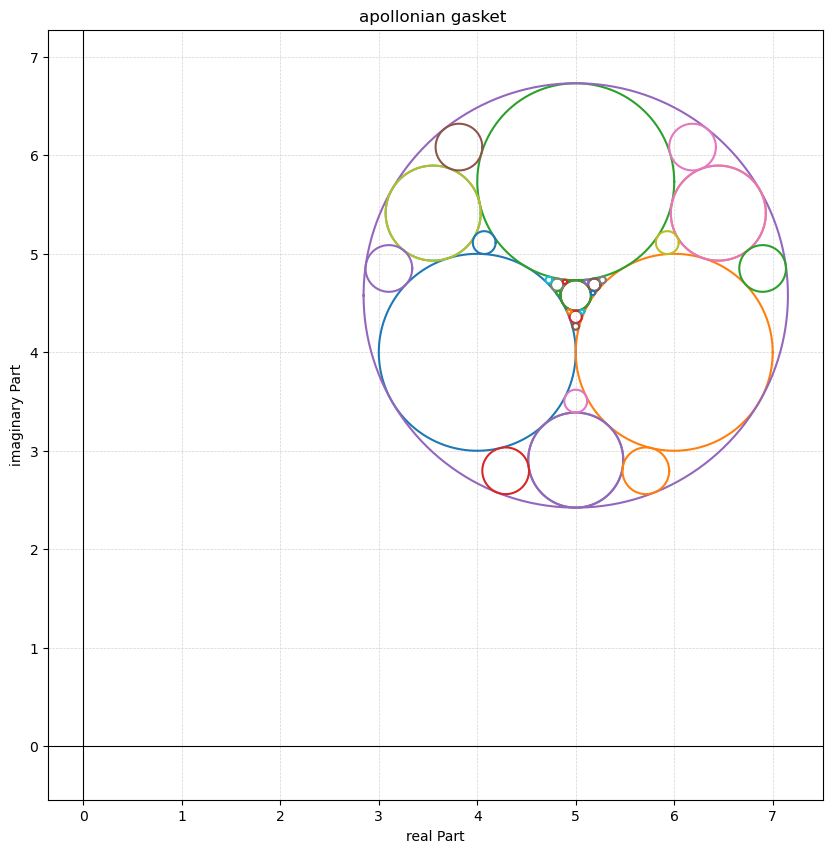

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import math
import cmath


def compute_fourth_circle_radius(curvature1, curvature2, curvature3):
    k4_first = curvature1 + curvature2 + curvature3 + 2 * math.sqrt(curvature1 * curvature2 + curvature1 * curvature3 + curvature2 * curvature3)
    k4_second = curvature1 + curvature2 + curvature3 - 2 * math.sqrt(curvature1 * curvature2 + curvature1 * curvature3 + curvature2 * curvature3)
    return k4_first, k4_second

def compute_fourth_circle_center(z1_k1, z2_k2, z3_k3, k4):
    z4_first = (z1_k1 + z2_k2 + z3_k3 + 2 * cmath.sqrt(z1_k1 * z2_k2 + z3_k3 * z1_k1 + z2_k2 * z3_k3)) / k4[0]
    z4_second = (z1_k1 + z2_k2 + z3_k3 - 2 * cmath.sqrt(z1_k1 * z2_k2 + z3_k3 * z1_k1 + z2_k2 * z3_k3)) / k4[1]
    return z4_first, z4_second

# Function to visualize the circles
def display_circles(circle_data):
    fig, ax = plt.subplots(figsize=(10, 10))

    for circle in circle_data:
        center, radius = circle
        theta = np.linspace(0, 2 * np.pi, 500)
        x = center.real + radius * np.cos(theta)
        y = center.imag + radius * np.sin(theta)
        ax.plot(x, y, linewidth=1.5)

    ax.set_aspect('equal', adjustable='datalim')
    plt.axhline(0, color="black", linewidth=0.8)
    plt.axvline(0, color="black", linewidth=0.8)
    plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
    plt.title("apollonian gasket ")
    plt.xlabel("real Part")
    plt.ylabel("imaginary Part")
    plt.show()

def are_circles_tangent(triplet):
    dist1 = abs(triplet[0][0] - triplet[1][0])
    dist2 = abs(triplet[0][0] - triplet[2][0])
    dist3 = abs(triplet[1][0] - triplet[2][0])

    real_dist1 = abs(triplet[0][1] + triplet[1][1]) if (triplet[0][1] < 0 or triplet[1][1] < 0) else (triplet[0][1] + triplet[1][1])
    real_dist2 = abs(triplet[0][1] + triplet[2][1]) if (triplet[0][1] < 0 or triplet[2][1] < 0) else (triplet[0][1] + triplet[2][1])
    real_dist3 = abs(triplet[1][1] + triplet[2][1]) if (triplet[1][1] < 0 or triplet[2][1] < 0) else (triplet[1][1] + triplet[2][1])

    tolerance = 0.1

    return (abs(dist1 - real_dist1) <= tolerance and
            abs(dist2 - real_dist2) <= tolerance and
            abs(dist3 - real_dist3) <= tolerance)

def generate_triplets(array, max_length, current_combination=[], current_length=0):
    if current_length == max_length:
        all_triplets.append(current_combination)
        return

    if not array:
        return 

    generate_triplets(array[1:], max_length, current_combination + [array[0]], current_length + 1)
    generate_triplets(array[1:], max_length, current_combination, current_length)

def create_new_circle(tangent_circles):
    new_k = compute_fourth_circle_radius(1 / tangent_circles[0][1],
                                          1 / tangent_circles[1][1],
                                          1 / tangent_circles[2][1])

    new_centers = compute_fourth_circle_center(tangent_circles[0][0] / tangent_circles[0][1],
                                        tangent_circles[1][0] / tangent_circles[1][1],
                                        tangent_circles[2][0] / tangent_circles[2][1], new_k)
    new_radii = [1 / new_k[0], 1 / new_k[1]]

    return new_centers, new_radii

# [c , r]
initial_circles = [
    [4 + 4j, 1],
    [6 + 4j, 1],
    [5 + (math.sqrt(3) + 4) * 1j, 1]
]

#recurs Apollonian gasket
previous_count = -1
current_depth = 0
max_depth = int(input("Enter the depth (please no more than 5): "))

if are_circles_tangent(initial_circles):
    new_centers, new_radii = create_new_circle(initial_circles)
    initial_circles.append([new_centers[0], new_radii[0]])
    initial_circles.append([new_centers[1], new_radii[1]])

while len(initial_circles) > previous_count:
    used_triplets = []
    previous_count = len(initial_circles)
    all_triplets = []
    generate_triplets(initial_circles, 3)  #triplets of size 3
    for triplet in all_triplets:
        if triplet not in used_triplets:
            if are_circles_tangent(triplet):
                new_centers, new_radii = create_new_circle(triplet)
                initial_circles.append([new_centers[0], new_radii[0]])
                used_triplets.append(triplet)
    current_depth += 1
    if current_depth == max_depth:
        break

# Plot the final circles
display_circles(initial_circles)

additional problem

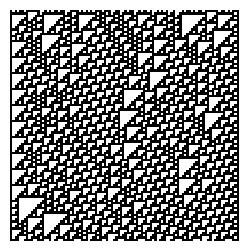

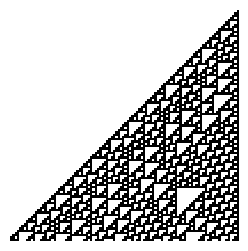

In [24]:
import random
import matplotlib.pyplot as plt

rule_110 = "01101110"
rule_110_rev = rule_110[::-1]
rule_map = {f"{i:03b}": int(rule_110_rev[i]) for i in range(8)}


def new_gen(old_gen):
    n = len(old_gen)
    next_gen = []
    for i in range(n):
        if i == 0:
            triplet = f"0{old_gen[i]}{old_gen[i + 1]}"
        elif i == n - 1:
            triplet = f"{old_gen[i - 1]}{old_gen[i]}0"
        else:
            triplet = f"{old_gen[i - 1]}{old_gen[i]}{old_gen[i + 1]}"
        
        next_gen.append(rule_map[triplet])
    return next_gen



def simulate_generations(initial_gen, generations):
    current_gen = initial_gen
    result = [current_gen]
    for i in range(generations):
        current_gen = new_gen(current_gen)
        result.append(current_gen)
    return result


def visualize(matrix):
    plt.figure(figsize=(3, 3))
    plt.imshow(matrix, cmap="binary", interpolation="nearest")
    plt.axis("off")
    plt.show()


n = int(input("Enter the number of cells: "))
generations = int(input("Enter the number of generations: "))
random_gen = [random.randint(0, 1) for _ in range(n)]

matrix_random = simulate_generations(random_gen, generations)
visualize(matrix_random)

nice_gen = [0 for i in range(n-1)]+[1]
matrix_random = simulate_generations(nice_gen, generations)
visualize(matrix_random)